# Chapter 2 Damped SHM
Code to support Chapter 2

October 2023

In [1]:
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mplines
import matplotlib.patches as patches



#Animations
from matplotlib import animation, rc
from IPython.display import HTML, Image

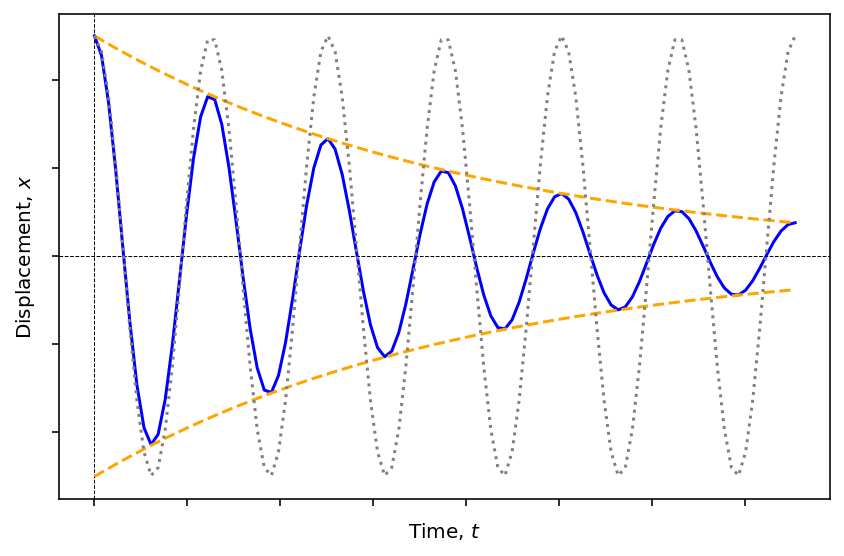

In [3]:
t = np.linspace(0,12*np.pi,100)
omega_1 = 1
delta_1 = 0
delta_2 = 3.14
A_0 = 5
tau = 10

def shm(thing, shift):
    x = A_0*np.cos(omega_1*thing + shift)
    return x

def damp(t):
    damp = np.exp(-t/(2*tau))
    return damp

#plt.xkcd(scale=5, length=3500, randomness=20)

fig = plt.figure()

ax = plt.axes()


ax.set_ylabel('Displacement, $x$')
ax.set_xlabel('Time, $t$')

plt.axvline(x=0,linewidth=0.5,color='k',linestyle="--")
plt.axhline(y=0,linewidth=0.5,color='k',linestyle="--")
#plt.text(10, 4,'Phase shift, $\delta = $'+str(delta_2), ha="right", va="center", size=10)
ax.plot(t, shm(t,delta_1)*damp(t),color='blue')
ax.plot(t, A_0*damp(t),color='orange',linestyle='--')
ax.plot(t, -A_0*damp(t),color='orange',linestyle='--')
ax.plot(t, shm(t,delta_1),color='gray',linestyle='dotted')

ax.set_xticklabels([])
ax.set_yticklabels([])
#ax.plot(t, shm(t,delta_2),color='orange')



plt.tight_layout()
plt.savefig('ch2-dampedoscill1.svg',transparent=True)
plt.savefig('ch2-dampedoscill1.pdf',transparent=True)

#plt.title('Test')
plt.show()


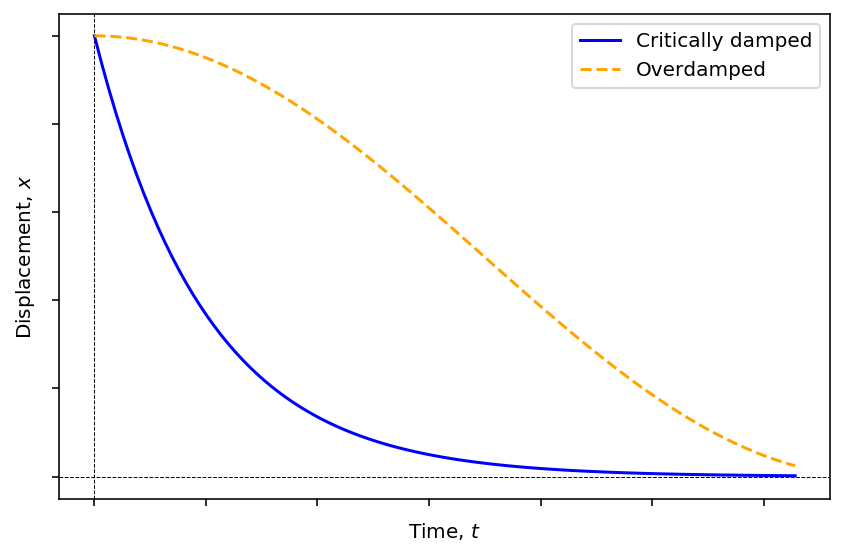

In [7]:
t = np.linspace(0,2*np.pi,100)
omega_0 = 1
delta_1 = 0
A_0 = 5
m = 1
b_c = 2*m*omega_0
b = b_c
tau = m/b


def omega_prime(w,damp):
        omega_prime = np.sqrt(w**2 - (0.5*damp/m)**2)
        return omega_prime

def damp_shm(thing, shift,w,damp):
    x = A_0*np.cos(omega_prime(w,damp)*thing + shift)*np.exp(-(t*damp)/(2*m))
    return x

def overdamp(thing,shift):
    x = 0.5*A_0*np.cos(0.45*thing+shift)+0.5*A_0
    return x

#plt.xkcd(scale=5, length=3500, randomness=20)

fig = plt.figure()

ax = plt.axes()


ax.set_ylabel('Displacement, $x$')
ax.set_xlabel('Time, $t$')

plt.axvline(x=0,linewidth=0.5,color='k',linestyle="--")
plt.axhline(y=0,linewidth=0.5,color='k',linestyle="--")
#plt.text(10, 4,'Phase shift, $\delta = $'+str(delta_2), ha="right", va="center", size=10)
ax.plot(t, damp_shm(t,delta_1,omega_0,b),color='blue',label='Critically damped')
ax.plot(t, overdamp(t,delta_1),color='orange',linestyle='--',label='Overdamped')
#ax.plot(t, A_0*damp(t),color='orange',linestyle='--')
#ax.plot(t, -A_0*damp(t),color='orange',linestyle='--')
#ax.plot(t, shm(t,delta_1),color='gray',linestyle='dotted')

ax.set_xticklabels([])
ax.set_yticklabels([])
#ax.plot(t, shm(t,delta_2),color='orange')


ax.legend()
plt.tight_layout()
plt.savefig('ch2-critoverdamp1.svg',transparent=True)
plt.savefig('ch2-critoverdamp1.pdf',transparent=True)
#plt.title('Test')
plt.show()
